<a href="https://colab.research.google.com/github/aounallahsara/ML_models/blob/main/TP3_ML_decisionTrees_EnsMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [ ]:
# connect to google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/data.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df = df.drop(columns='id', axis=1)

In [ ]:
df = df.drop(columns='Unnamed: 32', axis=1)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [ ]:
df['diagnosis'] = df['diagnosis'].map({'M':1, 'B':0})

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
df['diagnosis'].unique()

array([1, 0])

In [ ]:
df.isnull().sum()

,0
diagnosis,0
radius_mean,0
texture_mean,0
perimeter_mean,0
area_mean,0
smoothness_mean,0
compactness_mean,0
concavity_mean,0
concave points_mean,0
symmetry_mean,0


correlation

In [ ]:
df.corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [ ]:
corr = df.corr().abs()
high_corr = corr.where((corr > 0.9) & (corr < 1))
high_corr

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
radius_mean,NaN,NaN,NaN,0.997855,0.987357,NaN,NaN,NaN,NaN,NaN,...,0.969539,NaN,0.965137,0.941082,NaN,NaN,NaN,NaN,NaN,NaN
texture_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.912045,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
perimeter_mean,NaN,0.997855,NaN,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,...,0.969476,NaN,0.970387,0.941550,NaN,NaN,NaN,NaN,NaN,NaN
area_mean,NaN,0.987357,NaN,0.986507,NaN,NaN,NaN,NaN,NaN,NaN,...,0.962746,NaN,0.959120,0.959213,NaN,NaN,NaN,NaN,NaN,NaN
smoothness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
compactness_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concavity_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
concave points_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.921391,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.910155,NaN,NaN
symmetry_mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.corr()['diagnosis'].sort_values()

,diagnosis
smoothness_se,-0.067016
fractal_dimension_mean,-0.012838
texture_se,-0.008303
symmetry_se,-0.006522
fractal_dimension_se,0.077972
concavity_se,0.253730
compactness_se,0.292999
fractal_dimension_worst,0.323872
symmetry_mean,0.330499
smoothness_mean,0.358560


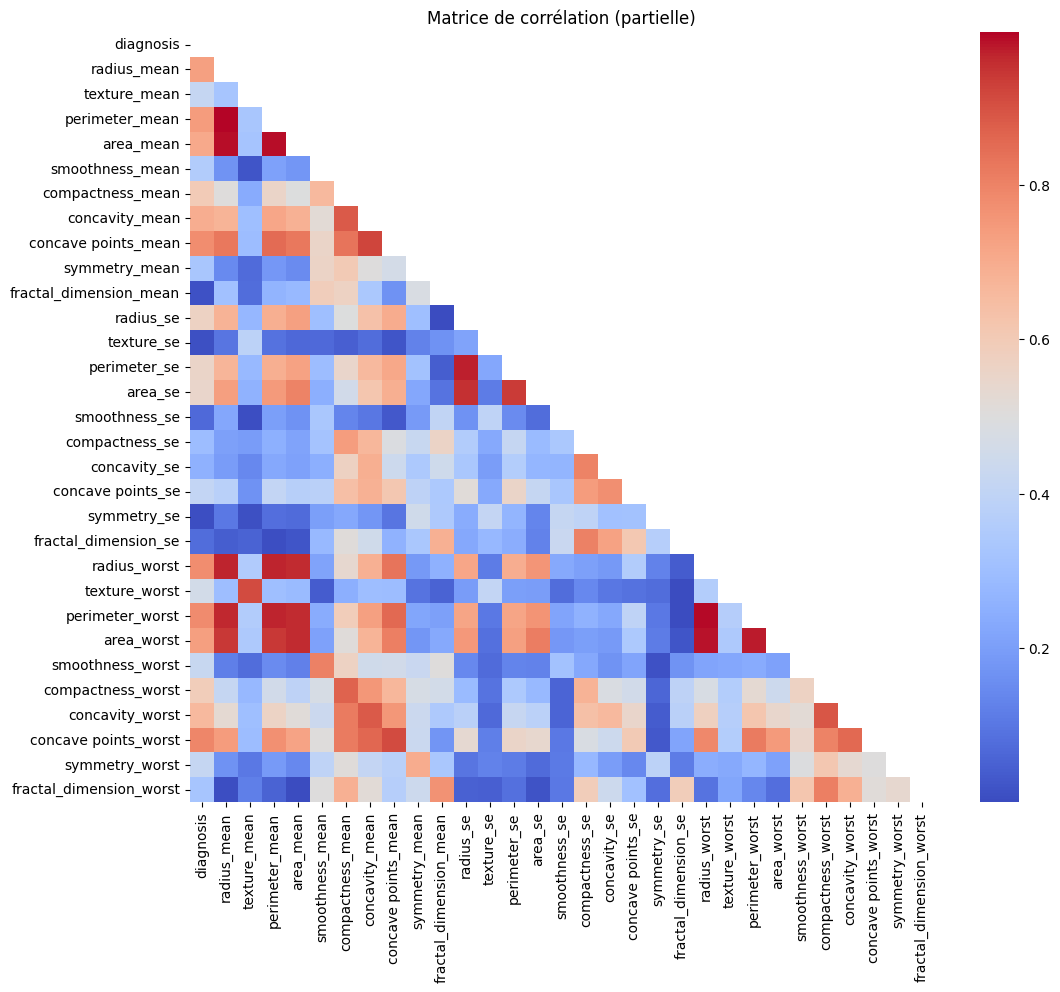

In [ ]:
import seaborn as sns

# Masquer la moitié supérieure
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(12, 10))
sns.heatmap(corr, mask=mask, annot=False, cmap='coolwarm')
plt.title("Matrice de corrélation (partielle)")
plt.show()

decision tree

In [ ]:
# train test split
train, test = train_test_split(df, test_size=0.2, random_state=1)

In [ ]:
train_x = train[train.columns[1:]]
train_y = train[train.columns[0]]
test_x = test[test.columns[1:]]
test_y = test[test.columns[0]]

In [ ]:
# train model
decisionTree = DecisionTreeClassifier(max_depth=5, random_state=42)
decisionTree.fit(train_x, train_y)

DecisionTreeClassifier(max_depth=5, random_state=42)

In [ ]:
#test model
dt_pred = decisionTree.predict(test_x)

In [ ]:
# Accurcay
print("Accuracy:", accuracy_score(test_y, dt_pred))
print("Precision:", precision_score(test_y, dt_pred))
print("Recall:", recall_score(test_y, dt_pred))
print("F1 Score:", f1_score(test_y, dt_pred))

Accuracy: 0.956140350877193
Precision: 0.9743589743589743
Recall: 0.9047619047619048
F1 Score: 0.9382716049382716


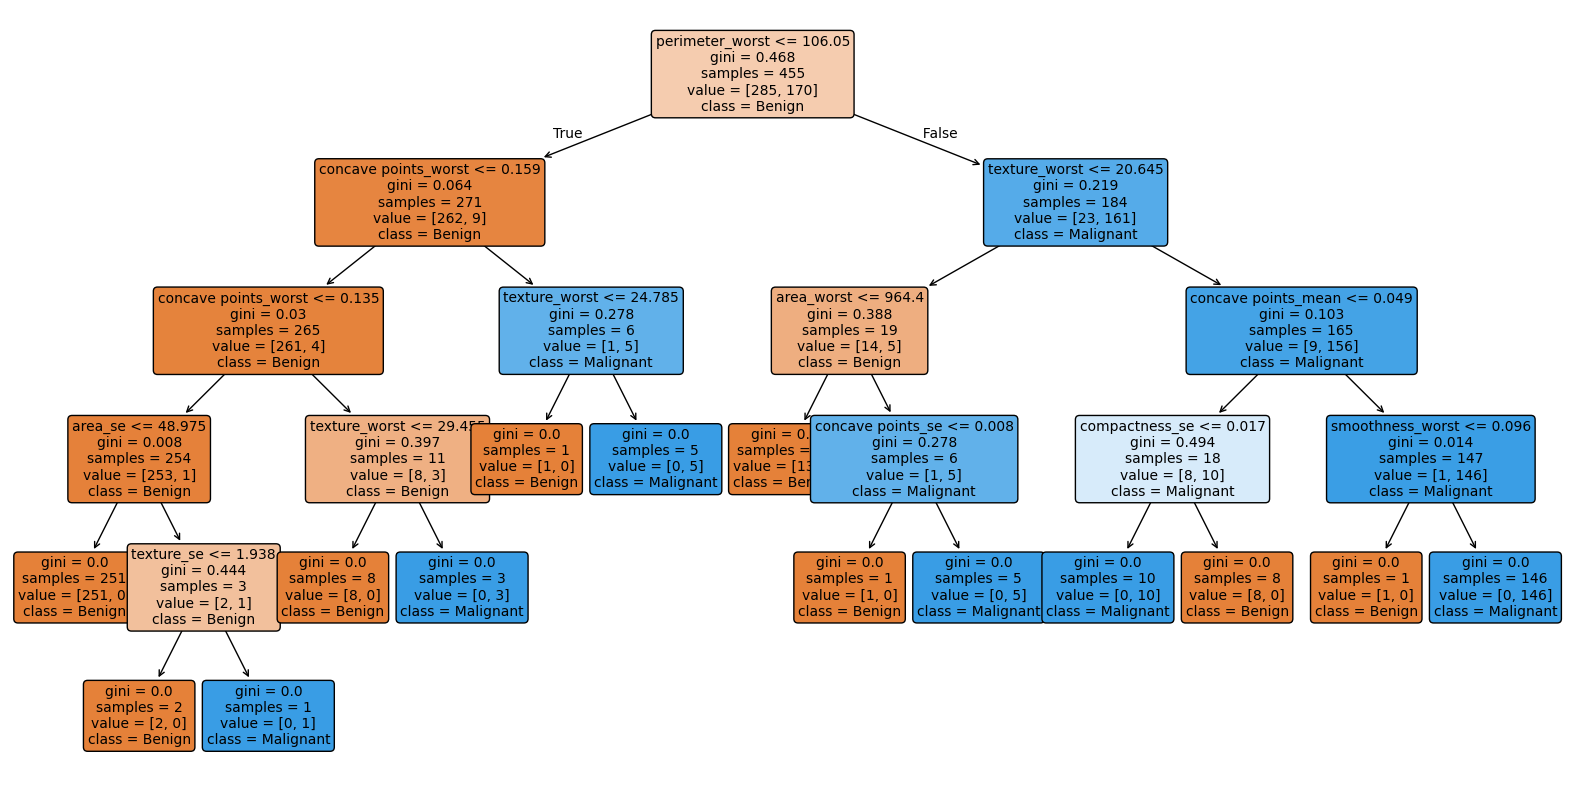

In [ ]:
from sklearn.tree import plot_tree
plt.figure(figsize=(20,10))
plot_tree(decisionTree,
          feature_names=train_x.columns,
          class_names=['Benign', 'Malignant'],
          filled=True,
          rounded=True,
          fontsize=10)
plt.show()

enembale methods

In [ ]:
# randomforest model (bagging)
randomForest = RandomForestClassifier(n_estimators=100, random_state=1)
randomForest.fit(train_x, train_y)
rf_pred = randomForest.predict(test_x)

In [ ]:
print("Random Forest Results:")
print("Accuracy:", accuracy_score(test_y, rf_pred))
print("Precision:", precision_score(test_y, rf_pred))
print("Recall:", recall_score(test_y, rf_pred))
print("F1 Score:", f1_score(test_y, rf_pred))

Random Forest Results:
Accuracy: 0.956140350877193
Precision: 1.0
Recall: 0.8809523809523809
F1 Score: 0.9367088607594937


In [ ]:
# adaboost (boosting)
adaboost = AdaBoostClassifier(n_estimators=100, random_state=1)
adaboost.fit(train_x, train_y)
ab_pred = adaboost.predict(test_x)

In [ ]:
print("\nAdaBoost Results:")
print("Accuracy:", accuracy_score(test_y, ab_pred))
print("Precision:", precision_score(test_y, ab_pred))
print("Recall:", recall_score(test_y, ab_pred))
print("F1 Score:", f1_score(test_y, ab_pred))


AdaBoost Results:
Accuracy: 0.9649122807017544
Precision: 0.975
Recall: 0.9285714285714286
F1 Score: 0.9512195121951219


In [ ]:
# stacking
base_models = [
    ('dt', DecisionTreeClassifier(max_depth=5, random_state=1)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=1)),
    ('ada', AdaBoostClassifier(n_estimators=100, random_state=1))
]

In [ ]:
stacking = StackingClassifier(
    estimators = base_models,
    final_estimator = LogisticRegression(),

)

In [ ]:
stacking.fit(train_x, train_y)
stack_pred = stacking.predict(test_x)

In [ ]:
print("\nStacking Results:")
print("Accuracy:", accuracy_score(test_y, stack_pred))
print("Precision:", precision_score(test_y, stack_pred))
print("Recall:", recall_score(test_y, stack_pred))
print("F1 Score:", f1_score(test_y, stack_pred))


Stacking Results:
Accuracy: 0.956140350877193
Precision: 1.0
Recall: 0.8809523809523809
F1 Score: 0.9367088607594937


In [ ]:
# comparative table
results = pd.DataFrame({
    'Model': ['Decision Tree', 'Random Forest', 'AdaBoost', 'stacking'],
    'Accuracy': [
        accuracy_score(test_y, dt_pred),
        accuracy_score(test_y, rf_pred),
        accuracy_score(test_y, ab_pred),
        accuracy_score(test_y, stack_pred)
    ],
    'Precision': [
        precision_score(test_y, dt_pred),
        precision_score(test_y, rf_pred),
        precision_score(test_y, ab_pred),
        precision_score(test_y, stack_pred)
    ],
    'Recall': [
        recall_score(test_y, dt_pred),
        recall_score(test_y, rf_pred),
        recall_score(test_y, ab_pred),
        recall_score(test_y, stack_pred)
    ],
    'F1 Score': [
        f1_score(test_y, dt_pred),
        f1_score(test_y, rf_pred),
        f1_score(test_y, ab_pred),
        f1_score(test_y, stack_pred)
    ]
})
results

,Model,Accuracy,Precision,Recall,F1 Score
0,Decision Tree,0.956140,0.974359,0.904762,0.938272
1,Random Forest,0.956140,1.000000,0.880952,0.936709
2,AdaBoost,0.964912,0.975000,0.928571,0.951220
3,stacking,0.956140,1.000000,0.880952,0.936709


compare results

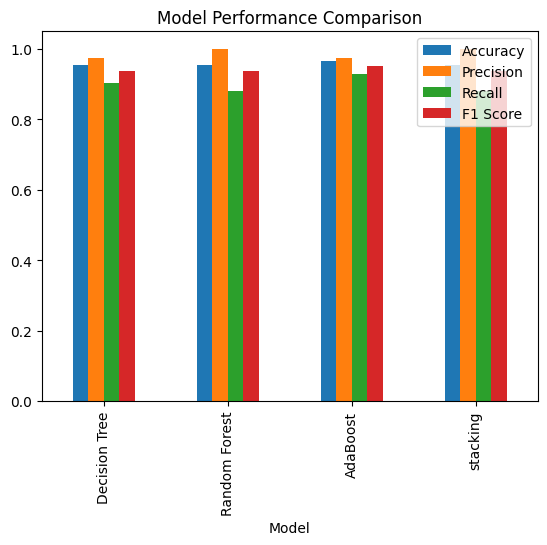

In [ ]:
# Visualising
results.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind='bar')
plt.title('Model Performance Comparison')
plt.show()

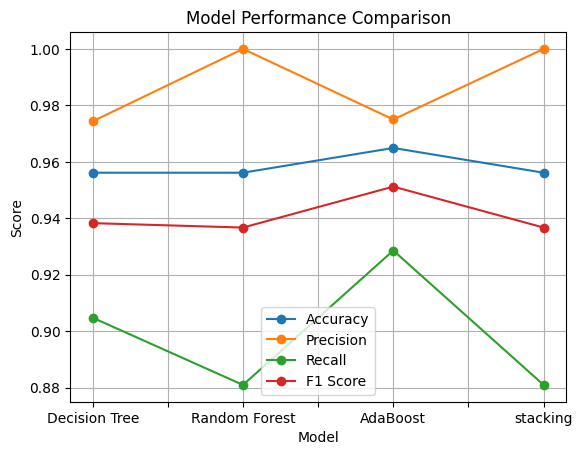

In [ ]:
# Analyzing

results.plot(x='Model', y=['Accuracy', 'Precision', 'Recall', 'F1 Score'], kind='line', marker='o')
plt.title('Model Performance Comparison')
plt.xlabel('Model')
plt.ylabel('Score')
plt.grid(True)
plt.show()

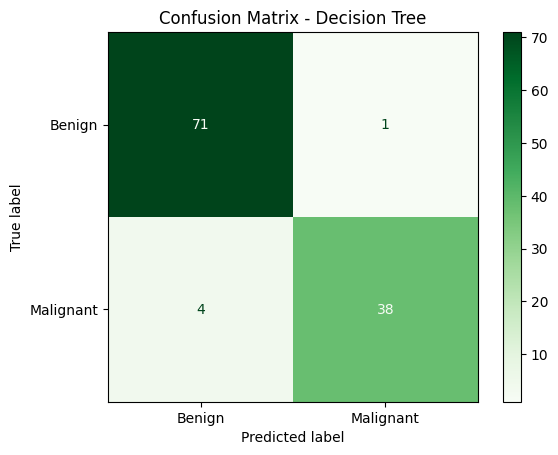

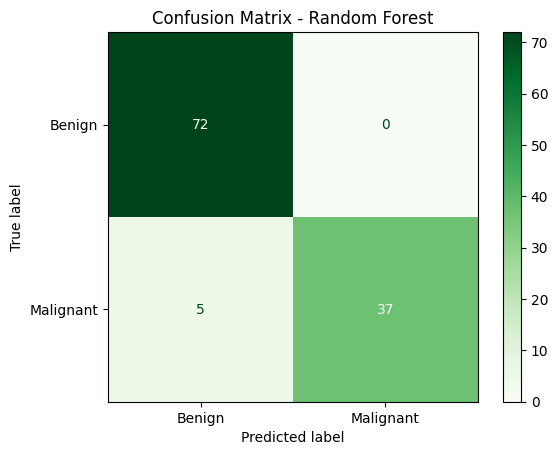

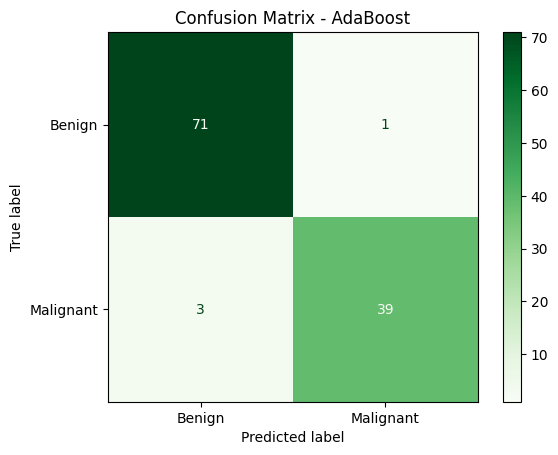

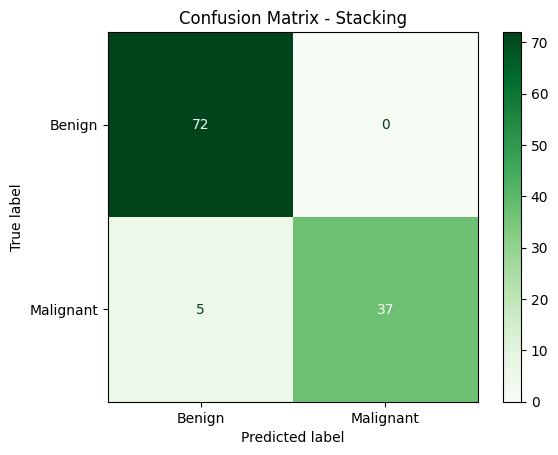

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

models = {
    "Decision Tree": decisionTree,
    "Random Forest": randomForest,
    "AdaBoost": adaboost,
    "Stacking": stacking
}

for name, model in models.items():
    cm = confusion_matrix(test_y, model.predict(test_x))
    disp = ConfusionMatrixDisplay(cm, display_labels=['Benign', 'Malignant'])
    disp.plot(cmap='Greens')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()